In [1]:
import numpy as np
import pandas as pd
import matplotlib
import pylab as pl
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mta = np.load("MTA_Fare.npy")

In [3]:
mta.shape

(600, 23, 194)

In [4]:
#23 represents different subway card types
#600 represents number of stations
#194 represents number of weeks

In [266]:
#mta[0]

In [6]:
print(len(mta[0]))

23


In [267]:
#mta[0][0]

In [8]:
print(len(mta[0][0]))

194


In [9]:
print(len(mta))

600


In [10]:
mta = mta.astype(float)

In [11]:
mta[mta == -1] = np.nan

### Task 1: Identify the most prominent event

In [12]:
mta_allsum = np.nansum(mta, axis=1)

In [13]:
print(mta_allsum.shape)

(600, 194)


In [14]:
print(len(mta_allsum))

600


In [15]:
mta_allsum_sum = np.nansum(mta_allsum, axis=0)

In [16]:
print(mta_allsum_sum.shape)

(194,)


In [17]:
ridershipmean = np.mean(mta_allsum_sum)
print(ridershipmean)

29781349.8711


In [18]:
ridershipstd = np.std(mta_allsum_sum)
print(ridershipstd)

2983960.4217


In [19]:
lowthresh = ridershipmean - 3 * ridershipstd
highthresh = ridershipmean + 3 * ridershipstd
print(lowthresh)
print(highthresh)

20829468.606
38733231.1362


In [20]:
event = np.where(mta_allsum_sum < lowthresh)
print(event)

(array([126]),)


In [21]:
print(mta_allsum_sum[126])

5218686.0


In [22]:
np.where(mta_allsum_sum > highthresh)

(array([], dtype=int64),)

In [23]:
time = pd.date_range(start=pd.datetime(2010, 5, 28), periods=194, freq='w-Fri')

In [24]:
time

DatetimeIndex(['2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
               '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
               '2010-07-23', '2010-07-30',
               ...
               '2013-12-06', '2013-12-13', '2013-12-20', '2013-12-27',
               '2014-01-03', '2014-01-10', '2014-01-17', '2014-01-24',
               '2014-01-31', '2014-02-07'],
              dtype='datetime64[ns]', length=194, freq='W-FRI')

In [25]:
weeks = pd.DataFrame()
weeks['Weekly Ridership Count'] = mta_allsum_sum
weeks = weeks.set_index(time)
weeks['Week Number'] = [i for i in range(0,len(mta_allsum_sum))]

In [26]:
weeks.loc[weeks['Week Number'] == 126]

,Weekly Ridership Count,Week Number
2012-10-26,5218686.0,126


In [27]:
weeks.loc[weeks['Week Number'] == 0]

,Weekly Ridership Count,Week Number
2010-05-28,26720267.0,0


In [28]:
mta_allsum_sum[126]

5218686.0

In [29]:
mta_allsum_sum[0]

26720267.0

The event is likely Hurricane Sandy, when the subway stations were closed. I say likely because there is a discrepancy between the number of weeks in the dataset (194) and the actual number of weeks between May 21, 2010 and February 21, 2014 (197). Because this count is off, the event detected seemingly occurred during the week of October 19, 2012, however Hurricane Sandy hit NYC on October 29, 2012. It is possible that the MTA doesn't have data for three weeks of subway rides, which would explain the discrepancy. To account for this discrepancy, I reset the timedate indext to start on May 28, 2010. 

### Task 2: identify ridership types that have steadily increased in popularity, and that have steadily decreased. Quantify this change. 
(e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [30]:
mta_ridetypesum = np.nansum(mta, axis=0)

In [31]:
mta_ridetypesum.shape

(23, 194)

In [32]:
#mta_ridetypesum[0]

In [33]:
mta_ridetypesum[0][193]

12459947.0

In [34]:
print(len(mta_ridetypesum))

23


In [35]:
#week 1 card 1 / week 1 mta_allsum_sum = weighted average

In [36]:
percentages = []
for k in range(0,194): #loops 194 times, or through each station
    divided = mta_ridetypesum[:,k] / mta_allsum_sum[k] 
    percentages.append(divided)
    k+=1        

In [37]:
print(len(mta_ridetypesum))

23


In [38]:
percentages = np.asarray(percentages)

In [39]:
percentages.shape

(194, 23)

In [40]:
#percentages

In [41]:
#e.g what is the ratio of usage for each card in the first 10 and last 10 weeks

In [42]:
#average usage for first 10 weeks per card
#biggest increase and decrease
f10avg = []
for i in range(0,23):
    f10avg.append([np.sum(percentages[:,i][0:10]) / 10])

In [43]:
print(f10avg)

[[0.4323758332138799], [0.018667879914906437], [0.001747888774052175], [0.0066771984615906846], [0.0016809924695701049], [0.1377988203571609], [0.31921905128417161], [0.00038445715784217666], [0.011499455022934802], [0.020970967982928107], [0.0014416294491197837], [0.0046142340963523194], [2.0149192786130862e-07], [0.0047993768693420091], [0.029531165859038498], [0.0022565820764281789], [0.0010920669776073161], [1.5862125688679772e-05], [0.0042370026074303865], [0.00074052545834824609], [0.00023214493048325028], [1.6663419196558629e-05], [0.0]]


In [44]:
l10avg = []
for i in range(0,23):
    l10avg.append([np.sum(percentages[:,i][184:]) / 10])

In [45]:
print(l10avg)

[[0.42486319148923801], [0.02241711221425282], [0.0018649674754867968], [0.005993728087443086], [0.0016359719489394387], [0.18469016252295994], [0.27426700469108073], [7.5001053141189809e-08], [1.1986040162549634e-07], [3.1234335191217004e-08], [0.0011225143010573295], [0.0053331510412701717], [0.0048449949884155326], [0.0026290407299293206], [0.018320167354906304], [0.0055663354538111991], [0.0030260589267161911], [0.001101266026220796], [0.0063353579037410237], [0.00072973476735097432], [0.00018290667630431766], [2.656074433966059e-05], [0.035049546560746478]]


In [46]:
f10avg = np.asarray(f10avg)

In [47]:
l10avg = np.asarray(l10avg)

In [48]:
diffs = l10avg / f10avg

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


In [49]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
ridedict = dict(zip(ridetype, diffs))
print(ridedict)

{'7d': array([ 1.34028841]), 'month': array([ 0.54778793]), '14d': array([ 1.20083868]), 'ez': array([  1.48940837e-06]), 'sen': array([ 2.77094628]), '30d': array([ 0.97321789]), '10t': array([ 0.98262474]), 'rr': array([ 2.46671083]), '1d': array([ 1.06698292]), 'stud': array([ inf]), 'ada': array([ 0.85918119]), 'spec': array([ 69.42739251]), 'exp': array([  1.04231376e-05]), 'ff': array([ 0.77864274]), 'tcmc': array([ 1.49524522]), '2t': array([ 0.89764115]), 'mc': array([ 1.15580418]), 'afas': array([ 0.00019508]), 't': array([ 0.98542833]), 'xbus': array([ 1.59395524]), 'mr': array([ 24045.6034137]), 'umlim': array([ 0.78789865]), 'rfm': array([ 0.62036722])}


In [86]:
ridedict = dict( (key, value) for (key, value) in ridedict.items() if value > 1.05 or value < .95 )

In [87]:
print(ridedict)

{'2t': array([ 0.89764115]), 'xbus': array([ 1.59395524]), 'stud': array([ inf]), '7d': array([ 1.34028841]), 'exp': array([  1.04231376e-05]), 'rr': array([ 2.46671083]), 'mr': array([ 24045.6034137]), 'spec': array([ 69.42739251]), 'ada': array([ 0.85918119]), 'ez': array([  1.48940837e-06]), '14d': array([ 1.20083868]), 'month': array([ 0.54778793]), 'mc': array([ 1.15580418]), 'afas': array([ 0.00019508]), '1d': array([ 1.06698292]), 'ff': array([ 0.77864274]), 'tcmc': array([ 1.49524522]), 'sen': array([ 2.77094628]), 'umlim': array([ 0.78789865]), 'rfm': array([ 0.62036722])}


In [89]:
df1 = pd.DataFrame(mta_ridetypesum).T

In [101]:
df1 = df1.rename(columns={0:'10t', 1:'14d', 2:'1d', 3:'2t', 4:'30d', 5:'7d', 6:'ada', 7:'afas', 8:'exp', 9:'ez',
            10:'ff', 11:'mc', 12:'mr', 13:'month', 14:'rfm', 15:'rr', 16:'sen', 17:'spec', 18:'tcmc', 19:'t',
            20:'umlim', 21:'xbus', 22:'stud'})
df1 = df1.drop(['30d', '10t', 't'], axis=1)
#'2t', 'xbus', 'stud', '7d', 'exp', 'rr', 'mr', 'spec', 'ada', 'ez', '14d', 'month', 'mc', 'afas', '1d', 'ff', 'tcmc', 'sen', 'umlim', 'rfm'

In [102]:
df1.columns

Index([u'14d', u'1d', u'2t', u'7d', u'ada', u'afas', u'exp', u'ez', u'ff',
       u'mc', u'mr', u'month', u'rfm', u'rr', u'sen', u'spec', u'tcmc',
       u'umlim', u'xbus', u'stud'],
      dtype='object')

In [103]:
df1 = df1.set_index(pd.DatetimeIndex(time))
df1.head()

,14d,1d,2t,7d,ada,afas,exp,ez,ff,mc,mr,month,rfm,rr,sen,spec,tcmc,umlim,xbus,stud
2010-05-28,530524.0,47801.0,186551.0,3697443.0,8551937.0,10063.0,333197.0,512032.0,35898.0,119881.0,4.0,123134.0,790110.0,59809.0,28221.0,0.0,124693.0,6128.0,358.0,0.0
2010-06-04,583533.0,51486.0,199229.0,3981808.0,9486394.0,11847.0,282755.0,578023.0,44577.0,143569.0,3.0,151948.0,908068.0,69209.0,32333.0,0.0,121713.0,6120.0,474.0,0.0
2010-06-11,586194.0,51636.0,199668.0,4033030.0,9476538.0,12277.0,302028.0,615537.0,45842.0,136383.0,12.0,151538.0,914124.0,69574.0,32618.0,0.0,122181.0,6490.0,465.0,0.0
2010-06-18,562602.0,52063.0,196389.0,4032753.0,9450081.0,11221.0,305513.0,606270.0,44271.0,134418.0,6.0,147094.0,902549.0,68099.0,32404.0,0.0,122051.0,6590.0,484.0,0.0
2010-06-25,548858.0,51153.0,194883.0,3925446.0,9294002.0,10515.0,335780.0,563446.0,41636.0,136351.0,9.0,137888.0,855573.0,66377.0,31933.0,176.0,119776.0,6313.0,452.0,0.0


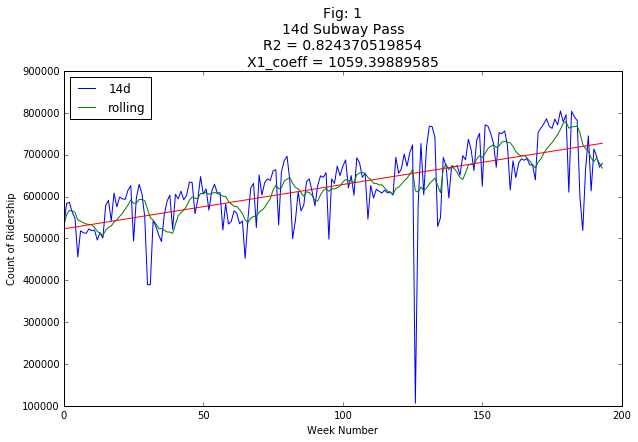

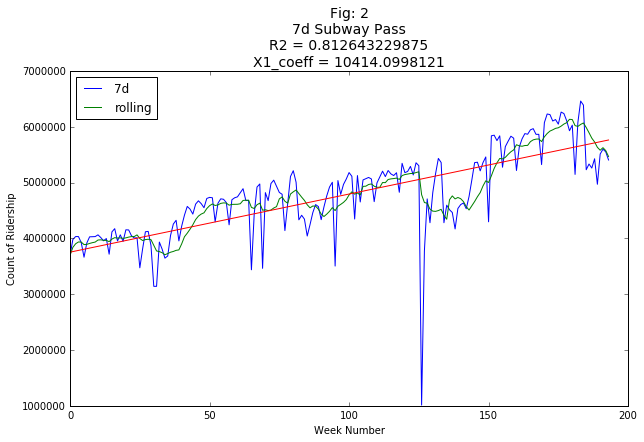

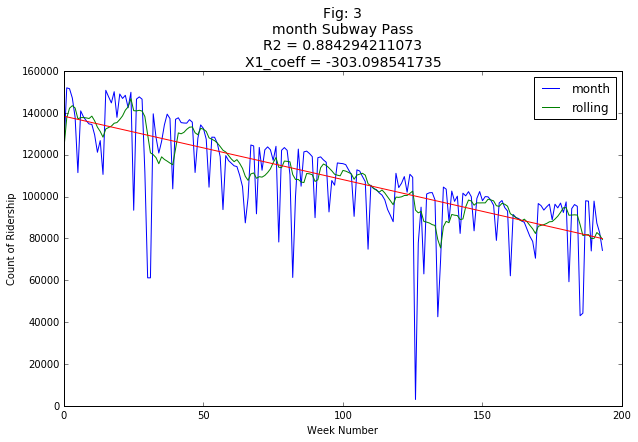

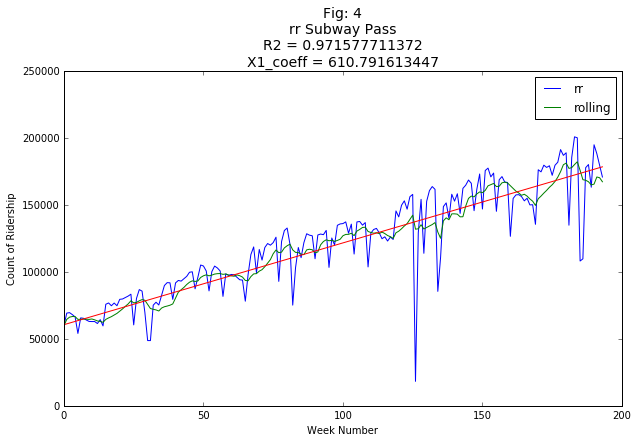

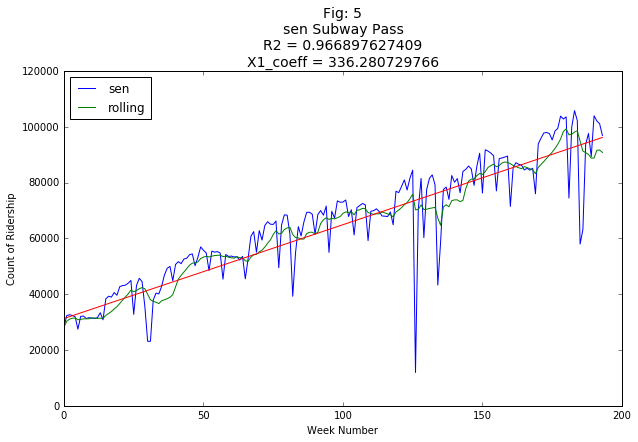

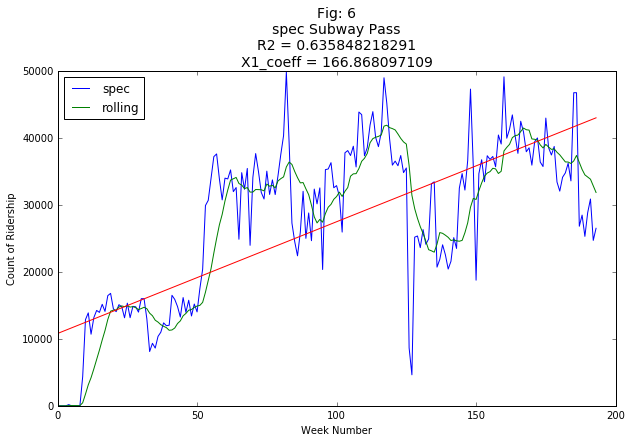

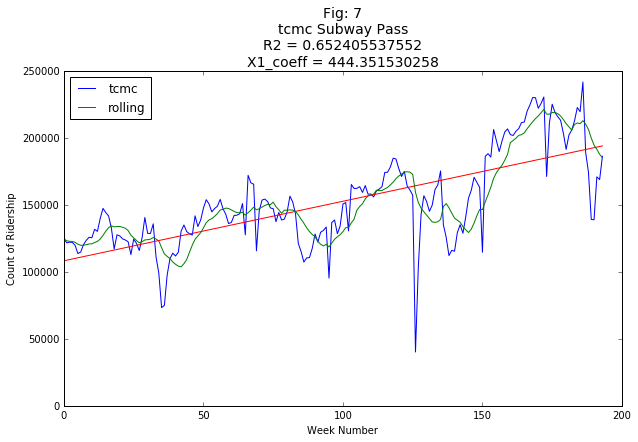

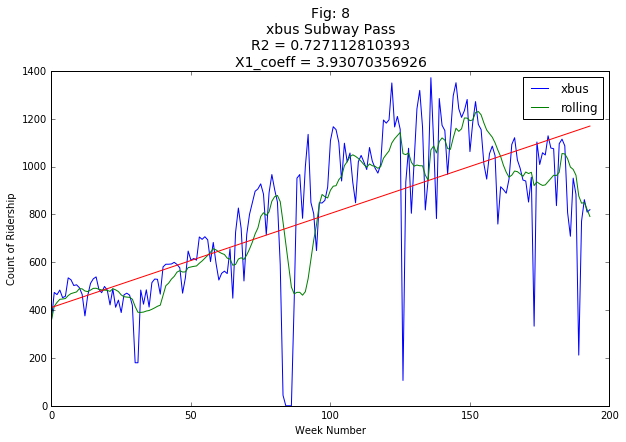

In [265]:
x = [i for i in range(0,194)]
#p = []
k=1
for i in range(0, 20):
    df2 = pd.DataFrame(df1.iloc[:,i])
    df2['rolling'] = df1.iloc[:,i].rolling(window=10, min_periods=1).mean()
    model = sm.OLS(df2['rolling'], sm.add_constant(x)).fit()
    if model.rsquared > .6:
        pl.figure(figsize=(10,6))
        pl.ylabel('Count of Ridership')
        pl.xlabel('Week Number')
        pl.title(str('Fig: ' + str(k) + '\n' + df1.columns[i]) + ' Subway Pass\n' + 'R2 = ' + str(model.rsquared) + '\nX1_coeff = ' + str((model.params)[1]), fontsize=14)
        pl.plot(x, df1.iloc[:,i])
        pl.plot(x, df2['rolling'])
        pl.plot(x, model.predict(sm.add_constant(x)))
        pl.legend(loc='best')
        #p.append({df1.columns[i]: model.params})
        #p.append({df1.columns[i]: model.rsquared})
        k+=1

#### Caption for Figures 1 - 8:
These figures plot the New York City subway card types which experienced significant increasing or decreasing trends in ridership from May 2010 through February 2014. The blue line is a plot of ridership, the green line is a smoothed plot of ridership (captures a rolling mean of 10 stations), and the red line is an ordinary least squares regression of the rolling mean. 

The ratio of the average of the last 10 weeks of ridership compared to the average of the first 10 weeks of ridership shows the rate of change over time but does not account for a trend over timel. A ratio greater than one indicates a high rate of increase in ridership over time and a low ratio, or a ratio less than one, represents a decrease in ridership. The ratio change for each card type is captured in 'ridedict' and printed above. In order to select the card types which experienced trends of increasing or decreasing ridership over time, I reduced the data under the following conditions: 1) I first reduced the number of stations to those which had a greater than 1.05 or less than  .95 average change in ridership from the first 10 weeks to the last 10 weeks. 2) I further reduced the dataset to include only those stations whose R2 value from the line of regression calculated by the rolling mean to be greater than .6. After doing so, I can conclude that the following card types experience a gradual increase in ridership from May 2010 through February 2014: 14d, 7d, rr, sen, spec, tcmc, and xbus. The only card type that had significant downward trends in ridership was the monthly pass. 

### Task 3: Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks)

In [56]:
#loop through 600 stations and find the 3rd index, which is the representation of annual frequency (happens 4 times
#in our dataset) and find the 4 stations with the higest frequency

In [217]:
i = 0
annuals = []
for i in range(0,600):
    elem = np.abs(np.fft.rfft(mta_allsum[i]))[4]
    annuals.append(elem)
    i+=1

In [218]:
station_key = [i for i in range(0,601)]

In [219]:
sorted_annual = sorted(annuals, key=float)    

In [241]:
print(sorted_annual[596:])

[2402218.5809588572, 2931895.8769513383, 2950388.929214194, 2980160.6355953491]


In [242]:
week_stations = dict(zip(station_key, annuals))
#print(week_stations)

Top 4 Stations:
* 327: 2402218.5809588572
* 150: 2931895.8769513383
* 194: 2950388.929214194
* 0: 2980160.6355953491

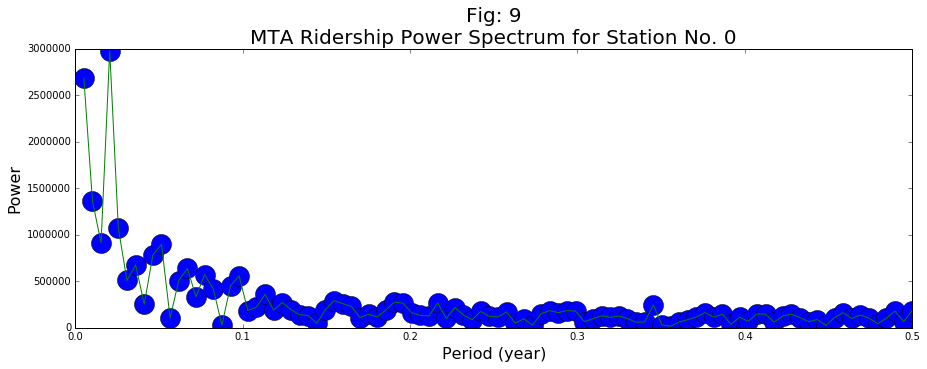

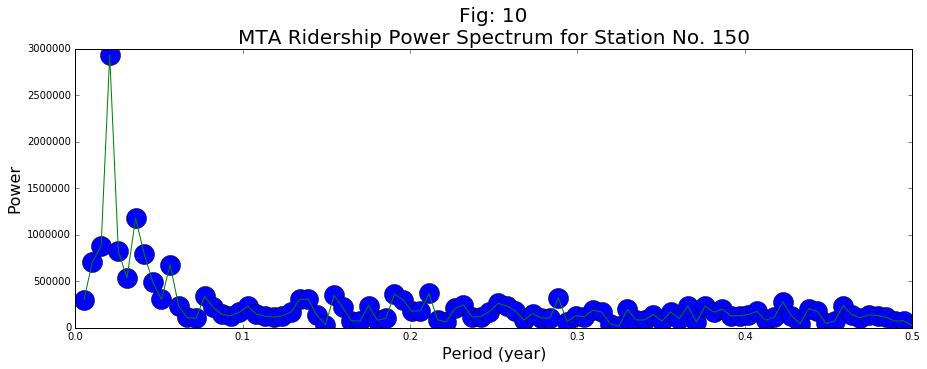

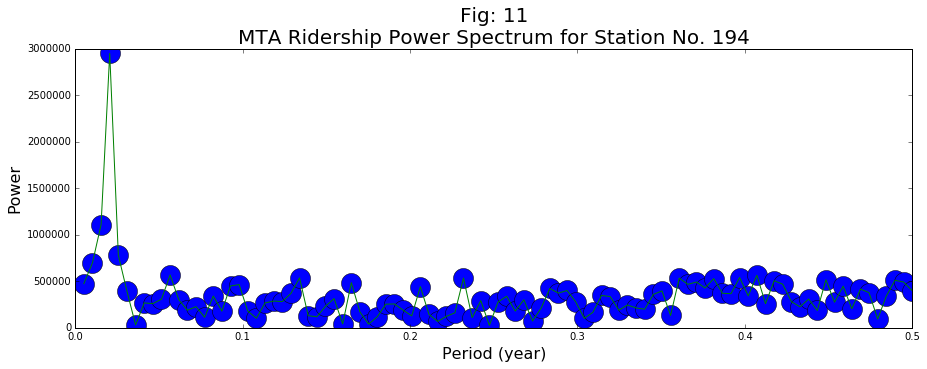

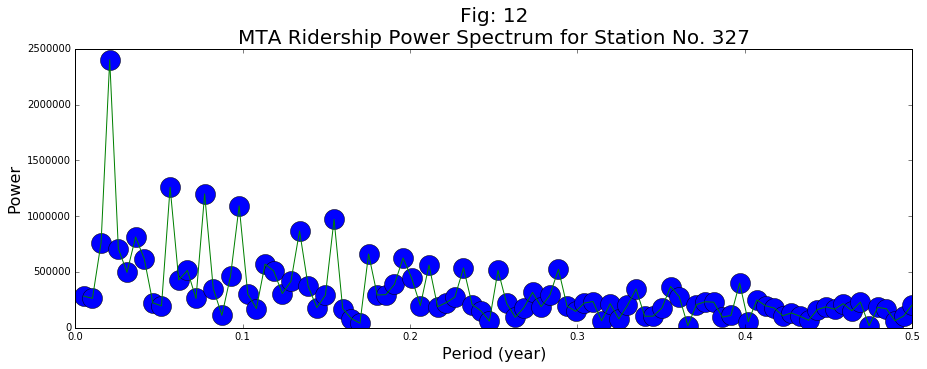

In [263]:
N = 194
stations = [0, 150, 194, 327]
k = 9
for elem in stations:
    f = np.abs(np.fft.rfft(mta_allsum[elem]))
    fig=pl.figure(figsize=(15,5))
    ax=fig.add_subplot(111)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    pl.xlabel('Period (year)', fontsize=16)
    pl.ylabel('Power', fontsize=16)
    pl.title('Fig: ' + str(k) + '\n' + 'MTA Ridership Power Spectrum for Station No. ' + str(elem), fontsize=20)
    k+=1

#### Caption for Figures 9 - 12
Figures 9 - 12 represent the power scores for MTA stations 0, 150, 194, and 327, which were the four stations that had the highest power score of ridership on an annual basis. In each figure, I started the plot at index 1, because the first index value was infinite. 